In [85]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
trn = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
test['SalePrice']=0
df = pd.concat([trn,test])

In [6]:
# convert this numerical to categorical (as it should be)
df = df.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45",
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75",
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120",
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"}})

# High Level Summary

In [9]:
print('Categorical: '+str(len(df.dtypes[df.dtypes=='object'])))
print('Numerical: '+str(len(df.dtypes[df.dtypes!='object']) - 1))

# we subtract one numerical variable ('Id') from our tabulation as it just functions as an index

Categorical: 44
Numerical: 36


In [10]:
# Further grouping is completed with thoughtful inspection and interpretation of variables

# Overall Missingness

In [14]:
#missing data by variable
total = df.isnull().sum().sort_values(ascending=False)
percent = 100*(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data.round(2)
#missing_data[missing_data.Total>1]
missing_data[missing_data.Total>0]

,Total,Percent
PoolQC,2909,99.66
MiscFeature,2814,96.40
Alley,2721,93.22
Fence,2348,80.44
FireplaceQu,1420,48.65
LotFrontage,486,16.65
GarageCond,159,5.45
GarageYrBlt,159,5.45
GarageFinish,159,5.45
GarageQual,159,5.45


# Categorical Missingness and Imputation

In [69]:
# First examine category dominance of every column
for i in range(len(df.columns)):
    if df.iloc[:,i].dtypes=='O':
        print("Variable: \t\t\t"+str(df.columns[i]))
        # print(round(100*(df.iloc[:,i].isnull().sum()/df.iloc[:,i].isnull().count()),2))
        print("Categories: \t\t\t"+str(len(df.iloc[:,i].value_counts())))
        print("Percent of Top Category: \t"+str(round(100*df.iloc[:,i].value_counts()[0]/sum(df.iloc[:,i].value_counts()),2))+'\n')

Variable: 			MSSubClass
0.0
Categories: 			16
Percent of Top Category: 	36.96

Variable: 			MSZoning
0.14
Categories: 			5
Percent of Top Category: 	77.7

Variable: 			Street
0.0
Categories: 			2
Percent of Top Category: 	99.59

Variable: 			Alley
93.22
Categories: 			2
Percent of Top Category: 	60.61

Variable: 			LotShape
0.0
Categories: 			4
Percent of Top Category: 	63.69

Variable: 			LandContour
0.0
Categories: 			4
Percent of Top Category: 	89.83

Variable: 			Utilities
0.07
Categories: 			2
Percent of Top Category: 	99.97

Variable: 			LotConfig
0.0
Categories: 			5
Percent of Top Category: 	73.07

Variable: 			LandSlope
0.0
Categories: 			3
Percent of Top Category: 	95.17

Variable: 			Neighborhood
0.0
Categories: 			25
Percent of Top Category: 	15.18

Variable: 			Condition1
0.0
Categories: 			9
Percent of Top Category: 	86.02

Variable: 			Condition2
0.0
Categories: 			8
Percent of Top Category: 	98.97

Variable: 			BldgType
0.0
Categories: 			5
Percent of Top Category: 	83.

In [70]:
# Categorical Variables with NAs
variable = []
topcat = []
catno = []
missno = []
misspct = []
for i in range(len(df.columns)):
    if df.iloc[:,i].dtypes=='O':
        if df.isnull().sum()[i]>0:
            #print("Variable: \t\t\t"+str(df.columns[i]))
            #print("Categories: \t\t\t"+str(len(df.iloc[:,i].value_counts())))
            #print("Percent of Top Category: \t"+str(round(100*df.iloc[:,i].value_counts()[0]/sum(df.iloc[:,i].value_counts()),2))+'\n')
            variable.append(df.columns[i])
            topcat.append(round(100*df.iloc[:,i].value_counts()[0]/sum(df.iloc[:,i].value_counts()),2))
            catno.append(len(df.iloc[:,i].value_counts()))
            missno.append(df.isnull().sum()[i])
            misspct.append(round(100*(df.iloc[:,i].isnull().sum()/df.iloc[:,i].isnull().count()),2))

In [75]:
missingcat = pd.DataFrame(data = {'Variable': variable, 
                                  'Pct Missing': misspct,
                                  'Missing Values': missno,
                                 'Top Category Pct': topcat, 
                                  'No. of Categories': catno})
missingcat

,Variable,Pct Missing,Missing Values,Top Category Pct,No. of Categories
0,MSZoning,0.14,4,77.70,5
1,Alley,93.22,2721,60.61,2
2,Utilities,0.07,2,99.97,2
3,Exterior1st,0.03,1,35.13,15
4,Exterior2nd,0.03,1,34.75,16
5,MasVnrType,0.82,24,60.17,4
6,BsmtQual,2.77,81,45.21,4
7,BsmtCond,2.81,82,91.86,4
8,BsmtExposure,2.81,82,67.11,4
9,BsmtFinType1,2.71,79,29.96,6


In [79]:
missingcat = missingcat.sort_values(by='Pct Missing',ascending=False)
missingcat.to_csv('missingcat.csv',index=False)

# Numerical Missingness and Imputation

In [80]:
# View missing numerical variables
for i in range(len(df.columns)):
    if df.iloc[:,i].dtypes!='O':
        if df.isnull().sum()[i]>0:
            print("Variable: \t"+str(df.columns[i]))

Variable: 	LotFrontage
Variable: 	MasVnrArea
Variable: 	BsmtFinSF1
Variable: 	BsmtFinSF2
Variable: 	BsmtUnfSF
Variable: 	TotalBsmtSF
Variable: 	BsmtFullBath
Variable: 	BsmtHalfBath
Variable: 	GarageYrBlt
Variable: 	GarageCars
Variable: 	GarageArea


In [81]:
# Numerical Variables with NAs
variable_num = []
missno_num = []
misspct_num = []
for i in range(len(df.columns)):
    if df.iloc[:,i].dtypes!='O':
        if df.isnull().sum()[i]>0:
            #print("Variable: \t\t\t"+str(df.columns[i]))
            #print("Categories: \t\t\t"+str(len(df.iloc[:,i].value_counts())))
            #print("Percent of Top Category: \t"+str(round(100*df.iloc[:,i].value_counts()[0]/sum(df.iloc[:,i].value_counts()),2))+'\n')
            variable_num.append(df.columns[i])
            missno_num.append(df.isnull().sum()[i])
            misspct_num.append(round(100*(df.iloc[:,i].isnull().sum()/df.iloc[:,i].isnull().count()),2))

In [90]:
missingnum = pd.DataFrame(data = {'Variable': variable_num, 
                                  'Pct Missing': misspct_num,
                                  'Missing Values': missno_num})
missingnum = missingnum.sort_values(by='Missing Values', ascending=False)
missingnum

,Variable,Pct Missing,Missing Values
0,LotFrontage,16.65,486
8,GarageYrBlt,5.45,159
1,MasVnrArea,0.79,23
6,BsmtFullBath,0.07,2
7,BsmtHalfBath,0.07,2
2,BsmtFinSF1,0.03,1
3,BsmtFinSF2,0.03,1
4,BsmtUnfSF,0.03,1
5,TotalBsmtSF,0.03,1
9,GarageCars,0.03,1


313.0

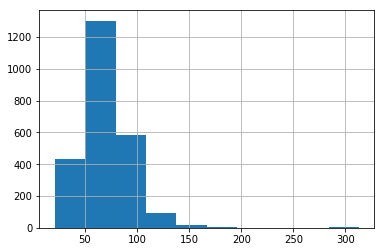

In [88]:
df.LotFrontage.hist()
max(df.LotFrontage)

In [91]:
missingnum.to_csv('missingnum.csv',index=False)

In [ ]:
# the same exercise, but after making the drops`
df_drops = df.drop(['Utilities','PoolQC','MiscFeature','Fence','GarageYrBlt','BsmtFinType1','BsmtFinType2',],axis=1)